# <span style="color: orange">**FiftyOne Keypoint Skeletons**

Dataset already downloaded
Loading 'quickstart'
 100% |█████████████████| 200/200 [2.4s elapsed, 0s remaining, 82.8 samples/s]          
Dataset 'skeletons' created



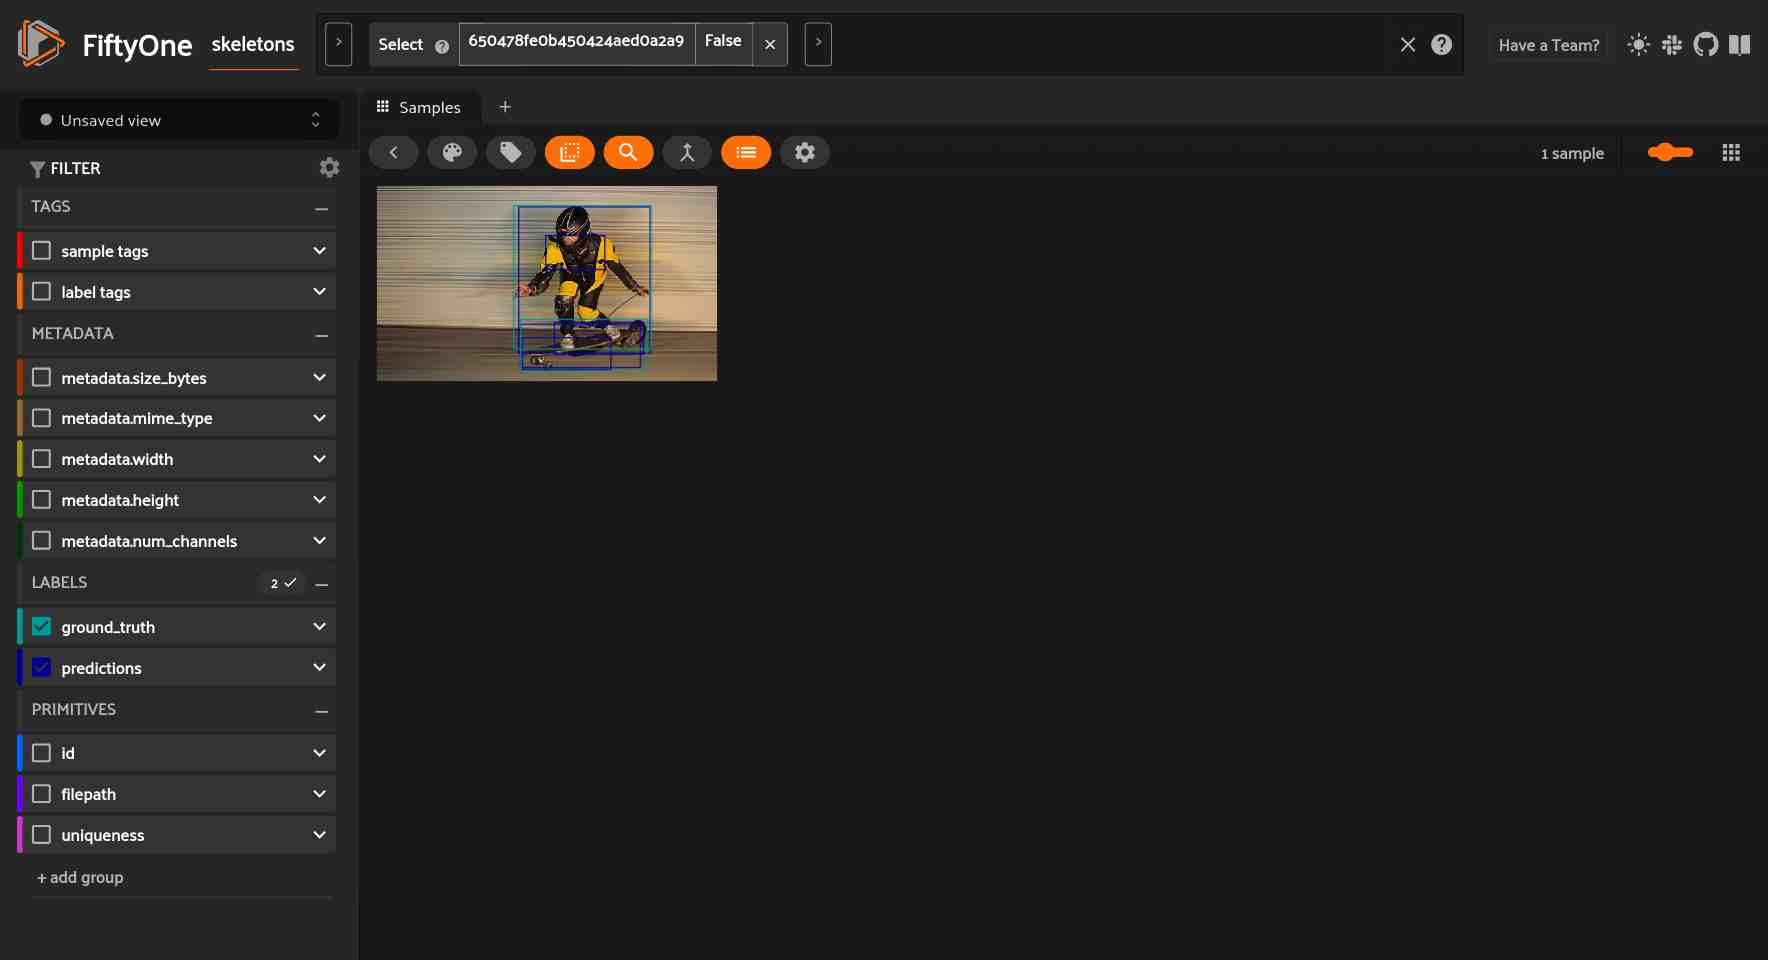


Could not connect session, trying again in 10 seconds



In [23]:
import fiftyone as fo
import fiftyone.zoo as foz


dataset = foz.load_zoo_dataset(
   "quickstart",
   dataset_name="skeletons",
)


session = fo.launch_app(dataset)

## Define your skeleton

In [24]:
dataset.skeletons = {
    "points": fo.KeypointSkeleton(
        labels=[
            "left hand" "left shoulder", "right shoulder", "right hand",
            "left eye", "right eye", "mouth",
        ],
        edges=[[0, 1, 2, 3], [4, 5, 6]],
    )
}

dataset.save()

In [ ]:
!export FIFTYONE_CVAT_USERNAME=""
!export FIFTYONE_CVAT_PASSWORD=""

## Annotate using one of FiftyOne's annotation integrations

In [25]:
ann_view = dataset.match_tags("annotate")
ann_view

Dataset:     skeletons
Media type:  image
Num samples: 1
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:   fiftyone.core.fields.FloatField
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. MatchTags(tags=['annotate'], bool=True, all=False)

In [26]:

# A unique identifer for this run
anno_key = "skeletons51"

# Upload the sample and launch CVAT
anno_results = ann_view.annotate(
    anno_key,
    label_field="points",
    label_type="keypoints",
    classes=["person"],
    launch_editor=True,
)

Computing metadata...
 100% |█████████████████████| 1/1 [155.0ms elapsed, 0s remaining, 6.5 samples/s] 
Uploading samples to CVAT...
Launching editor at 'http://localhost:8080/tasks/18/jobs/18'...


In [27]:
anno_results.get_status()

{'points': {18: {'name': 'FiftyOne_skeletons',
   'status': 'completed',
   'assignee': None,
   'last_updated': '2023-09-15T15:34:40.809777Z',
   'jobs': {18: {'url': 'http://localhost:8080/api/jobs/18',
     'id': 18,
     'task_id': 18,
     'project_id': None,
     'assignee': None,
     'guide_id': None,
     'dimension': '2d',
     'bug_tracker': None,
     'status': 'completed',
     'stage': 'acceptance',
     'state': 'completed',
     'mode': 'annotation',
     'frame_count': 1,
     'start_frame': 0,
     'stop_frame': 0,
     'data_chunk_size': 72,
     'data_compressed_chunk_type': 'imageset',
     'created_date': '2023-09-15T15:33:36.292099Z',
     'updated_date': '2023-09-15T15:34:40.792068Z',
     'issues': {'url': 'http://localhost:8080/api/issues?job_id=18',
      'count': 0},
     'labels': {'url': 'http://localhost:8080/api/labels?job_id=18',
      'count': 1},
     'type': 'annotation',
     'organization': None}}}}}

In [28]:
result = ann_view.load_annotation_results(anno_key)
result.get_status()

{'points': {18: {'name': 'FiftyOne_skeletons',
   'status': 'completed',
   'assignee': None,
   'last_updated': '2023-09-15T15:34:40.809777Z',
   'jobs': {18: {'url': 'http://localhost:8080/api/jobs/18',
     'id': 18,
     'task_id': 18,
     'project_id': None,
     'assignee': None,
     'guide_id': None,
     'dimension': '2d',
     'bug_tracker': None,
     'status': 'completed',
     'stage': 'acceptance',
     'state': 'completed',
     'mode': 'annotation',
     'frame_count': 1,
     'start_frame': 0,
     'stop_frame': 0,
     'data_chunk_size': 72,
     'data_compressed_chunk_type': 'imageset',
     'created_date': '2023-09-15T15:33:36.292099Z',
     'updated_date': '2023-09-15T15:34:40.792068Z',
     'issues': {'url': 'http://localhost:8080/api/issues?job_id=18',
      'count': 0},
     'labels': {'url': 'http://localhost:8080/api/labels?job_id=18',
      'count': 1},
     'type': 'annotation',
     'organization': None}}}}}

In [29]:
ann_view.to_dict()

 100% |█████████████████████| 1/1 [8.2ms elapsed, 0s remaining, 122.0 samples/s] 


{'name': 'skeletons',
 'version': '0.21.6',
 'media_type': 'image',
 'sample_fields': {'id': 'fiftyone.core.fields.ObjectIdField',
  'filepath': 'fiftyone.core.fields.StringField',
  'tags': 'fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)',
  'metadata': 'fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)',
  'ground_truth': 'fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)',
  'uniqueness': 'fiftyone.core.fields.FloatField',
  'predictions': 'fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)'},
 'info': {},
 'skeletons': {'points': SON([('labels', ['left handleft shoulder', 'right shoulder', 'right hand', 'left eye', 'right eye', 'mouth']), ('edges', [[0, 1, 2, 3], [4, 5, 6]])])},
 'stages': [{'_cls': 'fiftyone.core.stages.MatchTags',
   'kwargs': [['tags', ['annotate']], ['bool', True], ['all', False]]}],
 'samples': [{'filepath': '/home/dan/fiftyone/quickstart/data/004126.jpg',
   't

## Load the skeleton back in

In [30]:
ann_view.load_annotations("skeletons51", cleanup=True)

session.view = ann_view

Download complete
Loading labels for field 'points'...
 100% |█████████████████████| 1/1 [5.3ms elapsed, 0s remaining, 189.9 samples/s] 
Deleting tasks...
 100% |█████████████████████| 1/1 [108.0ms elapsed, 0s remaining, 9.3 samples/s] 
